In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

tqdm.pandas()

In [2]:
import sys
sys.path.insert(2,'..')


In [3]:
import functions
import selection
import DataPull

In [4]:
df_alphabet = DataPull.pull_alphabet()

In [5]:
selection_alphabet= selection.filter_options(df_alphabet)
selection_alphabet['implied_volatility'] = selection_alphabet.progress_apply(functions.implied_volatility,axis =1 )
average_iv_alphabet = functions.average_daily_implied_volatility(selection_alphabet)


  0%|                                                                            | 1/213806 [00:00<24:06:39,  2.46it/s]X:\github\ThesisProject\Jupyterlab\..\functions.py:75: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(s / k) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
X:\github\ThesisProject\Jupyterlab\..\functions.py:8: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
  1%|█                                                                           | 2987/213806 [00:16<38:47, 90.56it/s]C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\scipy\optimize\_zeros_py.py:329: RuntimeWarning: overflow encountered in scalar divide
  newton_step = fval / fder
X:\github\ThesisProject\Jupyterlab\..\functions.py:75: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(s / k) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
X:\github\ThesisProject\Jupyterlab\..\

In [16]:
average_iv_alphabet['date'] = pd.to_datetime(average_iv_alphabet['date'])

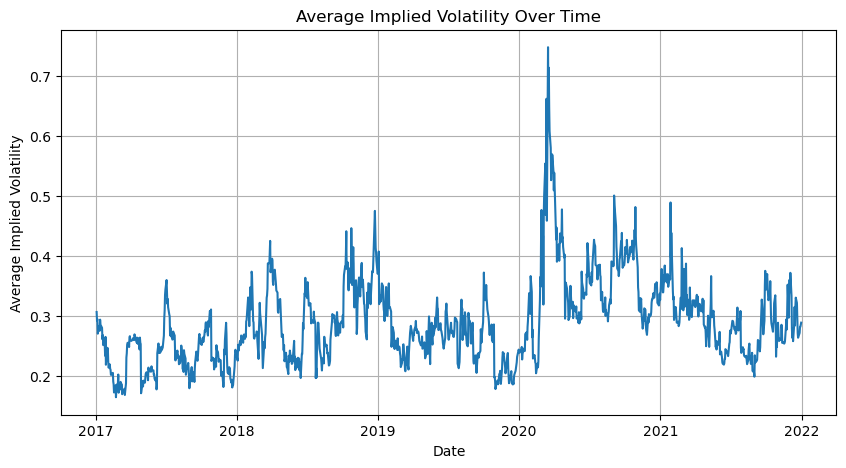

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(average_iv_alphabet['date'], average_iv_alphabet['average_iv'])
plt.title('Average Implied Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Average Implied Volatility')
plt.grid(True)
plt.show()

In [20]:
df_sp500 = DataPull.pull_sp500()


In [ ]:
selection_sp500= selection.filter_options(df_sp500)
selection_sp500['implied_volatility'] = selection_sp500.progress_apply(functions.implied_volatility,axis =1 )
average_iv_sp500= functions.average_daily_implied_volatility(selection_sp500)


  0%|                                                                                      | 0/1029654 [00:00<?, ?it/s]Exception ignored in: <function ZipFile.__del__ at 0x000001B1BF73E0C0>
Traceback (most recent call last):
  File "C:\Users\Ahmed\miniconda3\envs\myenv\Lib\zipfile.py", line 1886, in __del__
    self.close()
  File "C:\Users\Ahmed\miniconda3\envs\myenv\Lib\zipfile.py", line 1903, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file
  0%|                                                                         | 232/1029654 [00:04<2:18:40, 123.72it/s]X:\github\ThesisProject\Jupyterlab\..\functions.py:75: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(s / k) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
X:\github\ThesisProject\Jupyterlab\..\functions.py:8: RuntimeWarning: overflow encountered in scalar power
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))
  0%|▏                                     

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(average_iv_alphabet['date'], average_iv_alphabet['average_iv'])
plt.title('Average Implied Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Average Implied Volatility')
plt.grid(True)
plt.show()

In [ ]:
}